In [11]:
import os

import matplotlib.pyplot as plt
import pandas as pd
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#553939", "#9080ff", "#7d8f69"]

In [7]:
base_path = '/Volumes/noamaz/modularity'
csv_folder_path = f"{base_path}/teach_archs/retina/retina_teach_archs_requiered_features_vea/results"

Text(0.5, 1.0, 'Variational Autoencoder performance as a function of the latent space dimension\n')

<Figure size 640x480 with 0 Axes>

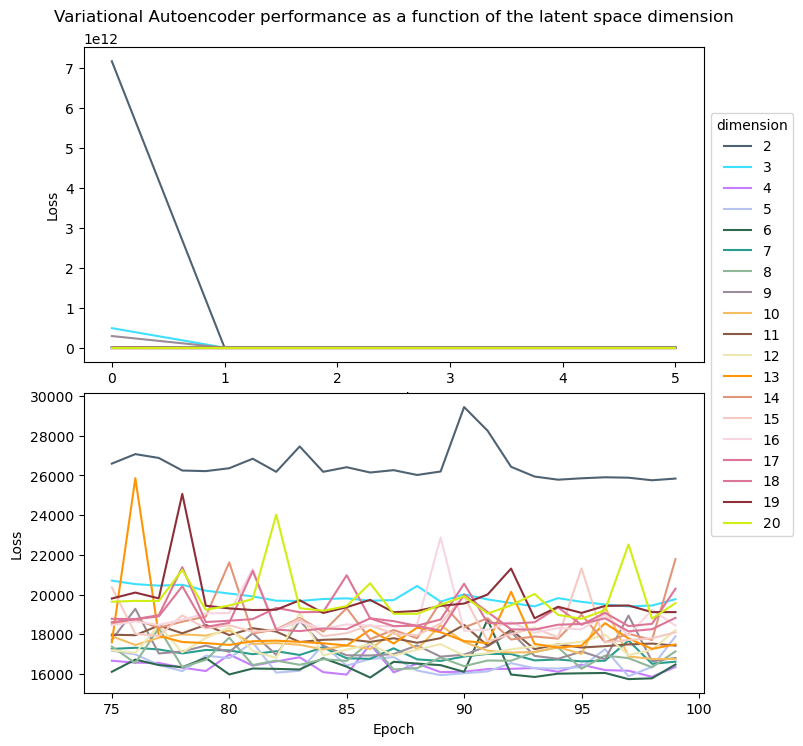

In [53]:
all_res_begining= {}
all_res_end= {}

for i, csv_name in enumerate(sorted(os.listdir(csv_folder_path))):
    if ".csv" in csv_name:
        res = pd.read_csv(f"{csv_folder_path}/{csv_name}")
        latent_space_dim = csv_name.split('latent_dim_')[1].split('.csv')[0]
        all_res_begining[int(latent_space_dim)] = [res['Epoch'][:6], res["losses"][:6]]
        all_res_end[int(latent_space_dim)] = [res['Epoch'][-25:], res["losses"][-25:]]
fig = plt.figure()
fig, (ax1, ax2,) = plt.subplots(2, 1, figsize=(8, 9))
for i in sorted(all_res_begining.keys()):
    ax1.plot(all_res_begining[i][0], all_res_begining[i][1], c=COLORS_20[i], label = i)
    ax2.plot(all_res_end[i][0], all_res_end[i][1], c=COLORS_20[i], label = i)

box1 = ax2.get_position()
ax2.set_position([box1.x0, box1.y0 + box1.height * 0.15,
                  box1.width, box1.height * 0.95])
ax2.legend(loc='lower left', fancybox=True, bbox_to_anchor=(1,0.5), ncol=1, title='dimension')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax1.set_title('Variational Autoencoder performance as a function of the latent space dimension\n')